In [42]:

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from plotnine import *
import plotly.express as px
import folium

from IPython.display import Javascript
from IPython.core.display import display, HTML

In [5]:
import pymysql
import pandas as pd
import pymysql.cursors
conn = pymysql.connect(host ='localhost',
                      user= 'root', 
                      password='root',
                      db= 'covid19',
                      port = 3306)
pd.read_sql("SHOW TABLES;", con=conn)
pays_europe = pd.read_sql("SELECT * FROM covid19.pays_europe", con=conn)


In [35]:
apple= pd.read_sql("SELECT * FROM covid19.donnees_appel", con=conn)
apple

,Country,Code_country,date,transportation_type,total_movilite
0,Albania,ALB,2020-01-13,driving,100.00
1,Albania,ALB,2020-01-13,walking,100.00
2,Albania,ALB,2020-01-14,driving,95.30
3,Albania,ALB,2020-01-14,walking,100.68
4,Albania,ALB,2020-01-15,walking,98.93
...,...,...,...,...,...
7975,Ukraine,UKR,2020-05-03,walking,55.73
7976,Ukraine,UKR,2020-05-04,driving,84.83
7977,Ukraine,UKR,2020-05-04,walking,59.52
7978,Ukraine,UKR,2020-05-05,driving,87.74


In [20]:
covid= pd.read_sql("SELECT * FROM covid19.donnees_covid_europe", con=conn)

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 5 columns):
Country                7980 non-null object
Code_country           7980 non-null object
date                   7980 non-null object
transportation_type    7980 non-null object
total_movilite         7980 non-null float64
dtypes: float64(1), object(4)
memory usage: 311.8+ KB


In [99]:
df_j

total_movilite                  
transportation_type        driving  transit  walking
date                                                
2020-01-13                 2800.00  1400.00  2800.00
2020-01-14                 2855.40  1392.91  2837.74
2020-01-15                 2923.98  1423.44  2933.83
2020-01-16                 2966.47  1436.81  3034.72
2020-01-17                 3280.80  1558.51  3515.54
...                            ...      ...      ...
2020-05-01                 1660.73   493.84  1382.94
2020-05-02                 1619.49   486.24  1365.96
2020-05-03                 1711.97   529.62  1465.26
2020-05-04                 1869.84   563.07  1590.16
2020-05-05                 1915.84   573.16  1638.23

[114 rows x 3 columns]

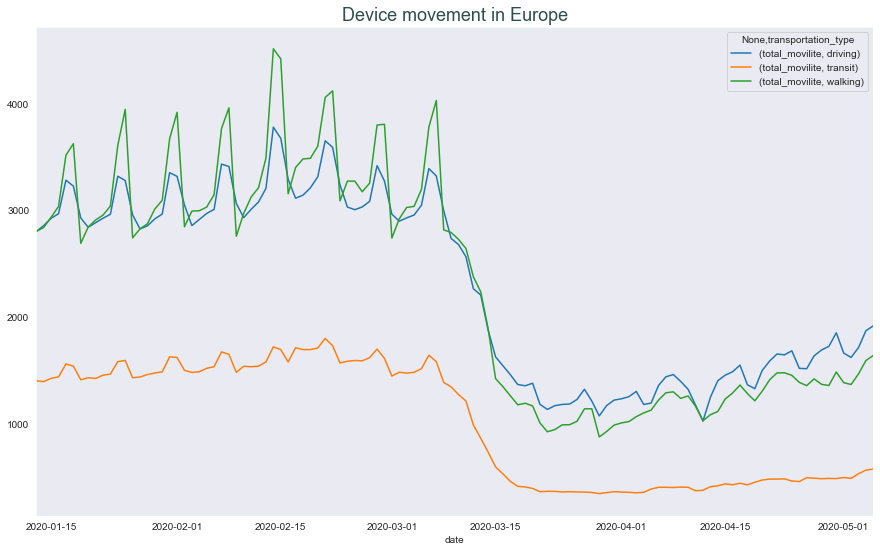

In [114]:
# df pour avoir nombre d'annonces disponibles par jour
df_j=apple.groupby(['date','transportation_type']).total_movilite.sum().to_frame()
# df_j=df_j[df_j.date>='2020-03-15'] #filtre pour débuter analyse à partir du 1er avril (dataset date=fin mars non relevant)

df_j
df_j =df_j.unstack()
df_j.plot(figsize=(15,9))
sns.set_style("darkgrid")
plt.grid()
plt.title("Device movement in Europe",fontsize=18, color='darkslategray')
plt.show()


In [134]:
df_j

total_movilite                  
transportation_type        driving  transit  walking
date                                                
2020-01-13                 2800.00  1400.00  2800.00
2020-01-14                 2855.40  1392.91  2837.74
2020-01-15                 2923.98  1423.44  2933.83
2020-01-16                 2966.47  1436.81  3034.72
2020-01-17                 3280.80  1558.51  3515.54
...                            ...      ...      ...
2020-05-01                 1660.73   493.84  1382.94
2020-05-02                 1619.49   486.24  1365.96
2020-05-03                 1711.97   529.62  1465.26
2020-05-04                 1869.84   563.07  1590.16
2020-05-05                 1915.84   573.16  1638.23

[114 rows x 3 columns]

In [120]:
# appel_france = appel[appel["Country"=="France"]]


appel['date'] = pd.to_datetime(appel['date'])
per = appel['date'].dt.to_period('M')
dtype = appel.groupby([per,"transportation_type"])['total_movilite'].sum().unstack()
dtype

transportation_type,driving,transit,walking
date,,,
2020-01,57046.90,28005.78,58937.25
2020-02,93055.09,46690.23,100072.65
2020-03,60588.02,25128.96,58674.49
2020-04,43127.77,12817.58,37845.42
2020-05,8777.87,2645.93,7442.55


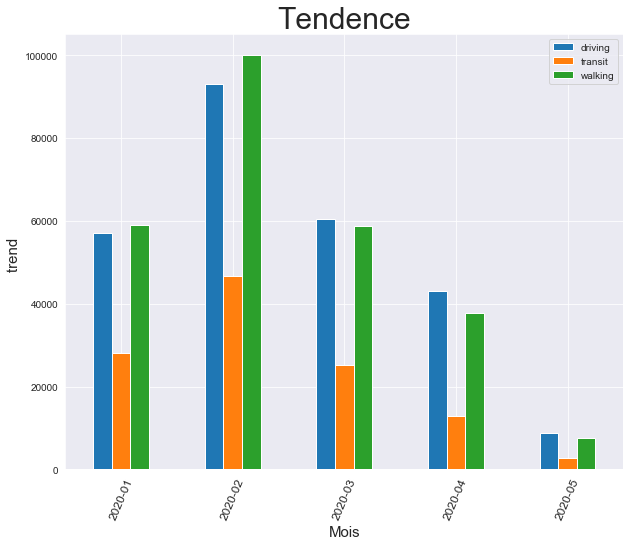

In [123]:
fig , ax = plt.subplots(figsize=(10,8))
dtype.plot(kind='bar' , ax= ax )


plt.xlabel( "Mois", fontsize= 15)
plt.ylabel("trend " , fontsize= 15)
ax.set_title("Tendence" , fontsize = 30)
plt.xticks(rotation=67 , fontsize = 12)
ax.legend()
plt.show()

In [119]:
appel

,Country,Code_country,date,transportation_type,total_movilite
0,Albania,ALB,2020-01-13,driving,100.00
1,Albania,ALB,2020-01-13,walking,100.00
2,Albania,ALB,2020-01-14,driving,95.30
3,Albania,ALB,2020-01-14,walking,100.68
4,Albania,ALB,2020-01-15,walking,98.93
...,...,...,...,...,...
7975,Ukraine,UKR,2020-05-03,walking,55.73
7976,Ukraine,UKR,2020-05-04,driving,84.83
7977,Ukraine,UKR,2020-05-04,walking,59.52
7978,Ukraine,UKR,2020-05-05,driving,87.74


In [ ]:
d=apple.groupby(['Country','transportation_type']).total_movilite.sum().to_frame()
df_s =df_s.unstack()
# df_j=df_j[df_j.date>='2020-03-15'] #filtre pour débuter analyse à partir du 1er avril (dataset date=fin mars non relevant)

df_s

In [110]:
# df pour avoir nombre d'annonces disponibles par jour
df_s=apple.groupby(['Country','transportation_type']).total_movilite.sum().to_frame()
df_s =df_s.unstack()
# df_j=df_j[df_j.date>='2020-03-15'] #filtre pour débuter analyse à partir du 1er avril (dataset date=fin mars non relevant)

df_s



total_movilite                   
transportation_type        driving  transit   walking
Country                                              
Albania                    7282.99      NaN   7036.88
Belgium                    9355.43  8799.64  11561.92
Bulgaria                   8551.57      NaN   8836.84
Croatia                    8127.73      NaN   8502.40
Denmark                   10486.60  8292.06  10396.15
Estonia                   11254.01  8885.50  12224.71
Finland                   11073.91  8409.46   9833.97
France                     7665.57  7407.46   6688.52
Germany                    9700.47  9212.45   9982.32
Greece                     8113.80      NaN   8670.45
Hungary                    9735.80      NaN   9935.72
Iceland                   11222.59      NaN   8554.83
Ireland                    9557.63  8008.12  10367.91
Italy                      7340.44  6266.75   7398.72
Latvia                    10363.91      NaN   9922.64
Lithuania                  9778.50      NaN  10187.87
Netherlands                9089.67  8026.52  10228.49
Norway                    10742.10  8679.58  10184.75
Poland                     8897.97      NaN   8517.77
Portugal                   8670.61      NaN   9086.56
Romania                    7583.17      NaN   7878.72
Slovakia                   9332.15  7987.96   9926.22
Slovenia                   8527.37      NaN   9947.86
Spain                      8282.51  7807.19   8439.13
Sweden                    11961.58  9609.23  10694.05
Switzerland                9967.56  7896.56   9828.69
Turkey                     9670.73      NaN   8894.06
Ukraine                   10259.28      NaN   9244.21

In [ ]:
df_j =df_j.unstack()

In [100]:
appel

,Country,Code_country,date,transportation_type,total_movilite
0,Albania,ALB,2020-01-13,driving,100.00
1,Albania,ALB,2020-01-13,walking,100.00
2,Albania,ALB,2020-01-14,driving,95.30
3,Albania,ALB,2020-01-14,walking,100.68
4,Albania,ALB,2020-01-15,walking,98.93
...,...,...,...,...,...
7975,Ukraine,UKR,2020-05-03,walking,55.73
7976,Ukraine,UKR,2020-05-04,driving,84.83
7977,Ukraine,UKR,2020-05-04,walking,59.52
7978,Ukraine,UKR,2020-05-05,driving,87.74


In [54]:
fig = px.line(df, x="region", y="2020-04-29", color_discrete_sequence=['green'], 
              title="Covid-19 Mobility Trends")
fig.show()

,Country,Code_country,date,transportation_type,total_movilite


In [125]:
appel.head(3)

,Country,Code_country,date,transportation_type,total_movilite
0,Albania,ALB,2020-01-13,driving,100.0
1,Albania,ALB,2020-01-13,walking,100.0
2,Albania,ALB,2020-01-14,driving,95.3


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from pandas.plotting import register_matplotlib_converters

In [133]:
means = {}
for t in ('driving', 'transit', 'walking'):
    means[t] = np.mean(appel[t][:28])


KeyError: 'driving'